# Especializaação em Inteligência Artificial Aplicada

## UFPR

## IAA007 e IAA008 - 2022 - Aprendizado de Máquina e Laboratório de IA

### Prof. Dr. Jaime Wojciechowski
### Estudante Clístenes Grizafis Bento
#### Seed utilizado: 85941

## Trabalho Final

___

### Classificação

#### Tabela de resultados de Veículos

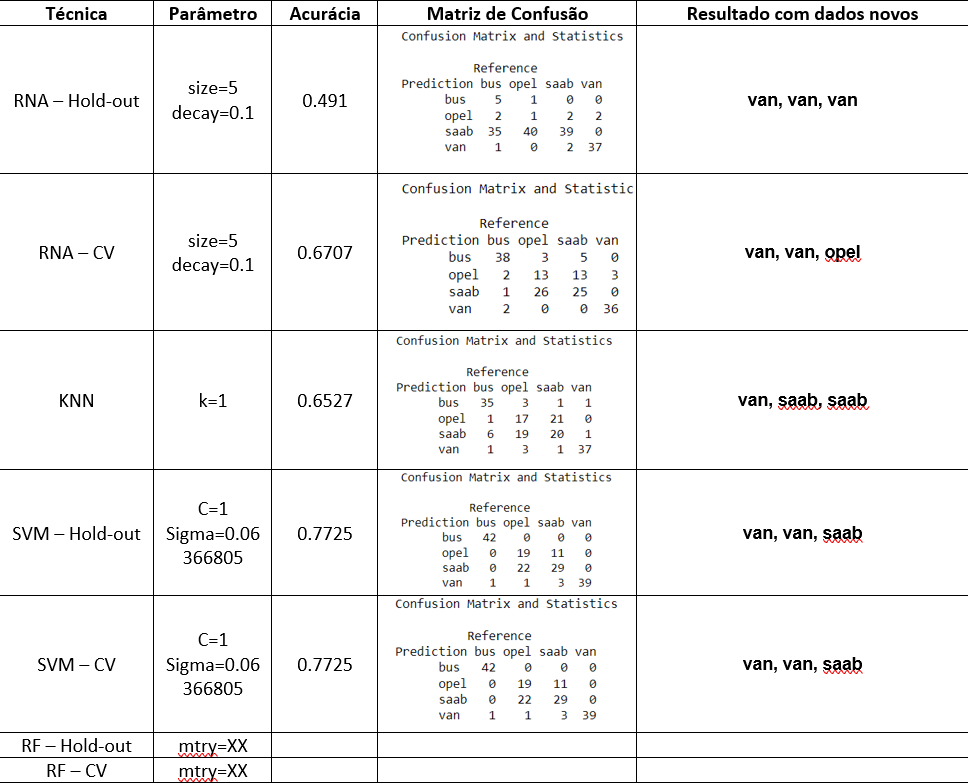

___

#### Listas de comandos usados, dados novos e resultados

Preparativos iniciais

In [165]:
#Importando biblioteca
library(caret)

#Criando dataFrame dos dados de veículos
dados_veiculos <- read.csv ("dados/Prática Veículos-20220813/Material 02 - 5 - C - Veiculos - Dados.csv")

#Removendo identificador único
dados_veiculos$a <- NULL

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Separando dados de teste e de treino
indices_veiculos <- createDataPartition(dados_veiculos$tipo, p=0.8, list=F)
treino_veiculos <- dados_veiculos[indices_veiculos,]
teste_veiculos <- dados_veiculos[-indices_veiculos,]

___

RNA - Hold out

In [187]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna <- train(tipo ~., data = treino_veiculos, method = "nnet", trace=F)

#Exibindo resultado do treino
rna

Neural Network 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 679, 679, 679, 679, 679, 679, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa     
  1     0e+00  0.2475141  0.01717271
  1     1e-04  0.2542129  0.02069871
  1     1e-01  0.4368892  0.25625817
  3     0e+00  0.2999435  0.08321089
  3     1e-04  0.3006301  0.08676842
  3     1e-01  0.5680331  0.42467122
  5     0e+00  0.3023699  0.08520482
  5     1e-04  0.3182838  0.10735057
  5     1e-01  0.5818335  0.44283647

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.1.

Temos **SIZE** = 5 e **DECAY** = 0.1

In [185]:
#Testando modelo treinado
predict.rna <- predict(rna, teste_veiculos)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rna, as.factor(teste_veiculos$tipo))

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus    5    1    0   0
      opel   2    1    2   2
      saab  35   40   39   0
      van    1    0    2  37

Overall Statistics
                                         
               Accuracy : 0.491          
                 95% CI : (0.413, 0.5694)
    No Information Rate : 0.2575         
    P-Value [Acc > NIR] : 8.502e-11      
                                         
                  Kappa : 0.32           
                                         
 Mcnemar's Test P-Value : 4.395e-14      

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity             0.11628    0.023810      0.9070     0.9487
Specificity             0.99194    0.952000      0.3952     0.9766
Pos Pred Value          0.83333    0.142857      0.3421     0.9250
Neg Pred Value          0.76398    0.743750      0.9245     0.9843
Prevalence              0.25749    0.251497   

A **Acurácia** foi de **0.491**

**Resultado com novos dados**

In [162]:
#Adicionando dados de veículos novos
dados_novos_veiculos <- read.csv("dados/Prática Veículos-20220813/Material 03 - 5 - C - Veiculos - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_veiculos$a <- NULL

#Realizando previsão com dados novos
resultado_veiculos_novos_rna <- predict(rna, dados_novos_veiculos)

#Removendo coluna de classe dos dados novos
dados_novos_veiculos$tipo <- NULL

#Unindo dados novos com resultados da previsão
resultado_veiculos_novos_rna <- cbind(dados_novos_veiculos, resultado_veiculos_novos_rna)

#Exibindo resultado
print(resultado_veiculos_novos_rna)

  Comp Circ DCirc RadRa PrAxisRa MaxLRa ScatRa Elong PrAxisRect MaxLRect
1  100   48    83   178       72     10    162    42         20      159
2   91   40    84   141       57      9    149    45         18      143
3   92   50   106   209       66     10    207    32         23      160
  ScVarMaxis ScVarmaxis RaGyr SkewMaxis Skewmaxis Kurtmaxis KurtMaxis HollRa
1        176        400   184        70         6        16       187    197
2        170        330    70        72         9        14       189    199
3        223        635   220        73        14         9       188    230
  resultado_veiculos_novos_rna
1                          van
2                          van
3                          van


O resultado com novos dados usando **RNA - Hold out** foi **van, van, van**

***

RNA - CV

In [168]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna2 <- train(tipo ~., data = treino_veiculos, method = "nnet", trace=F, trControl = ctrl)

#Exibindo resultado do treino
rna2

Neural Network 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 611, 612, 610, 611, 611, 611, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa      
  1     0e+00  0.2577051  0.004162254
  1     1e-04  0.2750538  0.026420132
  1     1e-01  0.4934585  0.322424175
  3     0e+00  0.3638728  0.147501448
  3     1e-04  0.3332538  0.106893444
  3     1e-01  0.6011289  0.467681804
  5     0e+00  0.3687238  0.157777372
  5     1e-04  0.3418359  0.117704146
  5     1e-01  0.6321128  0.509332633

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.1.

Temos **SIZE** = 5 e **DECAY** = 0.1

In [169]:
#Testando modelo treinado
predict.rna2 <- predict(rna2, teste_veiculos)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rna2, as.factor(teste_veiculos$tipo))

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   38    3    5   0
      opel   2   13   13   3
      saab   1   26   25   0
      van    2    0    0  36

Overall Statistics
                                          
               Accuracy : 0.6707          
                 95% CI : (0.5938, 0.7413)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5603          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              0.8837     0.30952      0.5814     0.9231
Specificity              0.9355     0.85600      0.7823     0.9844
Pos Pred Value           0.8261     0.41935      0.4808     0.9474
Neg Pred Value           0.9587     0.78676      0.8435     0.9767
Prevalence               0.2575     0

A **Acurácia** foi de **0.6707**

**Resultado com novos dados**

In [170]:
#Adicionando dados de veículos novos
dados_novos_veiculos <- read.csv("dados/Prática Veículos-20220813/Material 03 - 5 - C - Veiculos - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_veiculos$a <- NULL

#Realizando previsão com dados novos
resultado_veiculos_novos_rna2 <- predict(rna2, dados_novos_veiculos)

#Removendo coluna de classe dos dados novos
dados_novos_veiculos$tipo <- NULL

#Unindo dados novos com resultados da previsão
resultado_veiculos_novos_rna2 <- cbind(dados_novos_veiculos, resultado_veiculos_novos_rna2)

#Exibindo resultado
print(resultado_veiculos_novos_rna2)

  Comp Circ DCirc RadRa PrAxisRa MaxLRa ScatRa Elong PrAxisRect MaxLRect
1  100   48    83   178       72     10    162    42         20      159
2   91   40    84   141       57      9    149    45         18      143
3   92   50   106   209       66     10    207    32         23      160
  ScVarMaxis ScVarmaxis RaGyr SkewMaxis Skewmaxis Kurtmaxis KurtMaxis HollRa
1        176        400   184        70         6        16       187    197
2        170        330    70        72         9        14       189    199
3        223        635   220        73        14         9       188    230
  resultado_veiculos_novos_rna2
1                           van
2                           van
3                          opel


O resultado com novos dados usando **RNA - CV** foi **van, van, opel**

___

KNN

In [171]:
#Fazendo grid com valores de k para teste de melhor valor em KNN
tuneGrid <- expand.grid(k=c(1,3,5,7,9))

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
knn <- train(tipo ~., data = treino_veiculos, method = "knn", tuneGrid = tuneGrid)

#Exibindo resultado do treino
knn

k-Nearest Neighbors 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 679, 679, 679, 679, 679, 679, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  1  0.6234370  0.4971882
  3  0.6036817  0.4712101
  5  0.6022782  0.4693636
  7  0.5968883  0.4621603
  9  0.5953892  0.4600865

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

O melhor valor para **K** é **1**

In [172]:
#Testando modelo treinado
predict.knn <- predict(knn, teste_veiculos)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.knn, as.factor(teste_veiculos$tipo))

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   35    3    1   1
      opel   1   17   21   0
      saab   6   19   20   1
      van    1    3    1  37

Overall Statistics
                                          
               Accuracy : 0.6527          
                 95% CI : (0.5753, 0.7246)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.5369          
                                          
 Mcnemar's Test P-Value : 0.2632          

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              0.8140      0.4048      0.4651     0.9487
Specificity              0.9597      0.8240      0.7903     0.9609
Pos Pred Value           0.8750      0.4359      0.4348     0.8810
Neg Pred Value           0.9370      0.8047      0.8099     0.9840
Prevalence               0.2575      

A **Acurácia** foi de **0.6527**

**Resultado com novos dados**

In [174]:
#Adicionando dados de veículos novos
dados_novos_veiculos <- read.csv("dados/Prática Veículos-20220813/Material 03 - 5 - C - Veiculos - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_veiculos$a <- NULL

#Realizando previsão com dados novos
resultado_veiculos_novos_knn <- predict(knn, dados_novos_veiculos)

#Removendo coluna de classe dos dados novos
dados_novos_veiculos$tipo <- NULL

#Unindo dados novos com resultados da previsão
resultado_veiculos_novos_knn <- cbind(dados_novos_veiculos, resultado_veiculos_novos_knn)

#Exibindo resultado
print(resultado_veiculos_novos_knn)

  Comp Circ DCirc RadRa PrAxisRa MaxLRa ScatRa Elong PrAxisRect MaxLRect
1  100   48    83   178       72     10    162    42         20      159
2   91   40    84   141       57      9    149    45         18      143
3   92   50   106   209       66     10    207    32         23      160
  ScVarMaxis ScVarmaxis RaGyr SkewMaxis Skewmaxis Kurtmaxis KurtMaxis HollRa
1        176        400   184        70         6        16       187    197
2        170        330    70        72         9        14       189    199
3        223        635   220        73        14         9       188    230
  resultado_veiculos_novos_knn
1                          van
2                         saab
3                         saab


O resultado com novos dados usando **KNN** foi **van, saab, saab**

___

SVM - Hold out

In [176]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm <- train(tipo ~., data = treino_veiculos, method = "svmRadial")

#Exibindo resultado do treino
svm

Support Vector Machines with Radial Basis Function Kernel 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 679, 679, 679, 679, 679, 679, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.7112418  0.6149643
  0.50  0.7387898  0.6512009
  1.00  0.7606022  0.6803512

Tuning parameter 'sigma' was held constant at a value of 0.06366805
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.06366805 and C = 1.

Temos **C** = 1 e **SIGMA** = 0.06366805

In [177]:
#Testando modelo treinado
predict.svm <- predict(svm, teste_veiculos)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.svm, as.factor(teste_veiculos$tipo))

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   42    0    0   0
      opel   0   19   11   0
      saab   0   22   29   0
      van    1    1    3  39

Overall Statistics
                                          
               Accuracy : 0.7725          
                 95% CI : (0.7013, 0.8337)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6966          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              0.9767      0.4524      0.6744     1.0000
Specificity              1.0000      0.9120      0.8226     0.9609
Pos Pred Value           1.0000      0.6333      0.5686     0.8864
Neg Pred Value           0.9920      0.8321      0.8793     1.0000
Prevalence               0.2575      

A **Acurácia** foi de **0.6527**

**Resultado com novos dados**

In [178]:
#Adicionando dados de veículos novos
dados_novos_veiculos <- read.csv("dados/Prática Veículos-20220813/Material 03 - 5 - C - Veiculos - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_veiculos$a <- NULL

#Realizando previsão com dados novos
resultado_veiculos_novos_svm <- predict(svm, dados_novos_veiculos)

#Removendo coluna de classe dos dados novos
dados_novos_veiculos$tipo <- NULL

#Unindo dados novos com resultados da previsão
resultado_veiculos_novos_svm <- cbind(dados_novos_veiculos, resultado_veiculos_novos_svm)

#Exibindo resultado
print(resultado_veiculos_novos_svm)

  Comp Circ DCirc RadRa PrAxisRa MaxLRa ScatRa Elong PrAxisRect MaxLRect
1  100   48    83   178       72     10    162    42         20      159
2   91   40    84   141       57      9    149    45         18      143
3   92   50   106   209       66     10    207    32         23      160
  ScVarMaxis ScVarmaxis RaGyr SkewMaxis Skewmaxis Kurtmaxis KurtMaxis HollRa
1        176        400   184        70         6        16       187    197
2        170        330    70        72         9        14       189    199
3        223        635   220        73        14         9       188    230
  resultado_veiculos_novos_svm
1                          van
2                          van
3                         saab


O resultado com novos dados usando **SVM - Hold out** foi **van, van, saab**

___

SVM - CV

In [179]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm2 <- train(tipo ~., data = treino_veiculos, method = "svmRadial", trControl = ctrl)

#Exibindo resultado do treino
svm2

Support Vector Machines with Radial Basis Function Kernel 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 611, 612, 610, 611, 611, 611, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.7079898  0.6110419
  0.50  0.7449972  0.6601001
  1.00  0.7700010  0.6933465

Tuning parameter 'sigma' was held constant at a value of 0.06366805
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.06366805 and C = 1.

Temos **C** = 1 e **SIGMA** = 0.06366805

In [181]:
#Testando modelo treinado
predict.svm2 <- predict(svm2, teste_veiculos)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.svm2, as.factor(teste_veiculos$tipo))

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   42    0    0   0
      opel   0   19   11   0
      saab   0   22   29   0
      van    1    1    3  39

Overall Statistics
                                          
               Accuracy : 0.7725          
                 95% CI : (0.7013, 0.8337)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6966          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              0.9767      0.4524      0.6744     1.0000
Specificity              1.0000      0.9120      0.8226     0.9609
Pos Pred Value           1.0000      0.6333      0.5686     0.8864
Neg Pred Value           0.9920      0.8321      0.8793     1.0000
Prevalence               0.2575      

A **Acurácia** foi de **0.7725**

**Resultado com novos dados**

In [180]:
#Adicionando dados de veículos novos
dados_novos_veiculos <- read.csv("dados/Prática Veículos-20220813/Material 03 - 5 - C - Veiculos - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_veiculos$a <- NULL

#Realizando previsão com dados novos
resultado_veiculos_novos_svm2 <- predict(svm2, dados_novos_veiculos)

#Removendo coluna de classe dos dados novos
dados_novos_veiculos$tipo <- NULL

#Unindo dados novos com resultados da previsão
resultado_veiculos_novos_svm2 <- cbind(dados_novos_veiculos, resultado_veiculos_novos_svm2)

#Exibindo resultado
print(resultado_veiculos_novos_svm2)

  Comp Circ DCirc RadRa PrAxisRa MaxLRa ScatRa Elong PrAxisRect MaxLRect
1  100   48    83   178       72     10    162    42         20      159
2   91   40    84   141       57      9    149    45         18      143
3   92   50   106   209       66     10    207    32         23      160
  ScVarMaxis ScVarmaxis RaGyr SkewMaxis Skewmaxis Kurtmaxis KurtMaxis HollRa
1        176        400   184        70         6        16       187    197
2        170        330    70        72         9        14       189    199
3        223        635   220        73        14         9       188    230
  resultado_veiculos_novos_svm2
1                           van
2                           van
3                          saab


O resultado com novos dados usando **SVM - CV** foi **van, van, saab**

#### Tabela de resultados de Imposto de Renda

#### Tabela de resultados de Diabetes

#### Tabela de resultados de Banco

#### Tabela de resultados de Previsão do tempo